# ClearWater-Riverine Demo 1: Getting Started with Conservative Transport

**Objective**: Demonstrate how to use the [ClearWater-riverine](https://github.com/EcohydrologyTeam/ClearWater-riverine) library to simulate 2D conservative transport (advection and mixing) on Sumwere Creek.

A second demo notebook couples ClearWater-riverine to ClearWater-modules to simulate water quality reaction processes, such as heat balance for water temperature modeling.

## Background
ClearWater-Riverine is a two-dimensional (2D) water quality model for complex river systems and floodplains. It is developed by the Environmental Laboratory, U.S Army Engineer Research and Development Center (ERDC). The intent of this model is to simulate the transport (advection and mixing) of heat and water quality constituents in riverine systems by integrating it with ERDC's ClearWater (Corps Library for Environmental Analysis and Restoration of Watersheds) modules.

### Install ClearWater-Riverine

Carefully follow our **[Installation Instructions](https://github.com/EcohydrologyTeam/ClearWater-riverine?tab=readme-ov-file#installation)**.

## Example Case Study
This example shows how to run Clearwater Riverine in a fictional location, "Sumwere Creek" (shown below). The flow field for Sumwere Creek comes from a HEC-RAS 2D model, which has a domain of 200x200 meters and a base mesh of 10x10 meters 

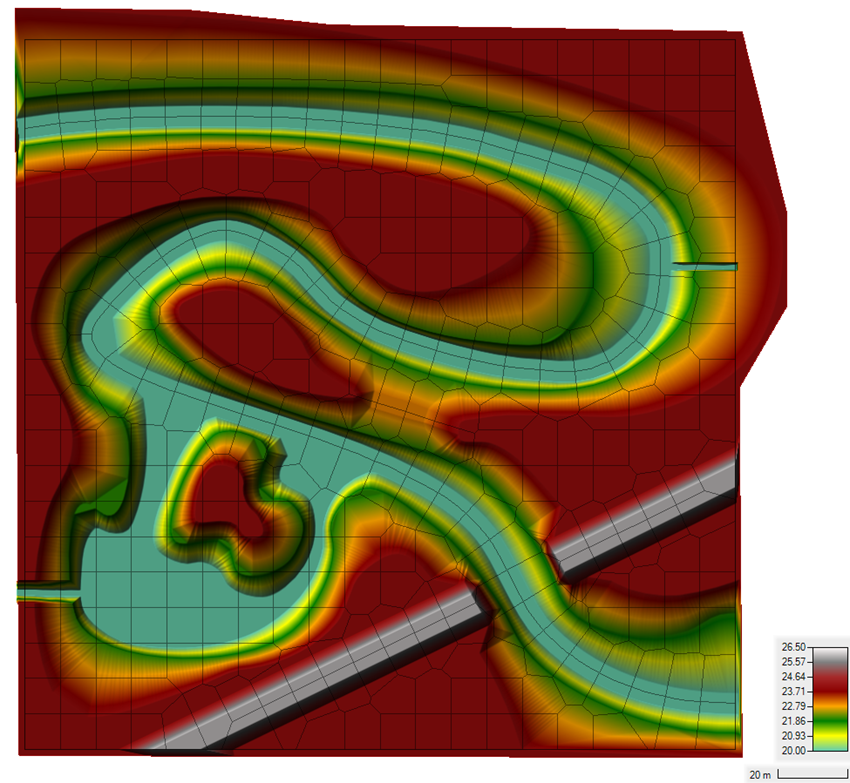

The upstream boundary for Sumwere Creek is at the top left of the model domain, flowing into the domain at a constant 3 cms. At the first bend in the creek, there is an additional boundary representing a spring-fed tributary to the creek (1 cms). Further downstream, there is a meander in the stream forming a slow-flowing oxbow lake. There is another boundary flowing into that oxbow lake, representing a powerplant discharge (0.5 cms). 

The downstream boundary is a constant stage set at 20.75 m. The upstream inflows have a water temperature of 15 degrees C; the spring-fed creek has constant inflows of 5 C, and the powerplant is steady at 20 C with periodic higher temperature (25 C) discharges in a downstream meander.

### Data Availability
All data required run this notebook is available at this [Google Drive](https://drive.google.com/drive/folders/19uCjAJPZh4g6r1ZWzk1D_B8jZGluSc4N?usp=drive_link). 
This notebook will use the `sumwere_creek_coarse_p48` model. Please download the entire folder and place it in the `data_temp` folder of this repository to run the rest of the notebook. Alternatively, if you would like to run a different version of the model (see the [ReadMe](https://docs.google.com/document/d/1FKjrTZHUYmYxo0mgn72dOezHtq-CFR86rQ1ObD1ZY0c/edit) for details), download that folder, place it in the `datat_temp` folder, and define the name of the mesh folder below:

In [1]:
model_name = 'sumwere_creek_coarse_p48'

## Model Set-Up

### General Imports

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
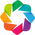

In [2]:
from pathlib import Path
import holoviews as hv
hv.extension("bokeh")

### Import ClearWater-riverine
These steps require first completing **[Installation](https://github.com/EcohydrologyTeam/ClearWater-riverine?tab=readme-ov-file#installation)** of a [conda](https://conda.io/docs/) virtual environment customized for the ClearWater-riverine library.

In [3]:
# Find project directory (i.e. the parent to `/examples` directory for this notebook)
project_path = Path.cwd().parent
project_path

WindowsPath('C:/Users/sjordan/OneDrive - LimnoTech/Documents/GitHub/clearwater-riverine')

In [4]:
# Your source directory should be: 
src_path = project_path / 'src'
src_path

WindowsPath('C:/Users/sjordan/OneDrive - LimnoTech/Documents/GitHub/clearwater-riverine/src')

Next, we'll need to import Clearwater Riverine. While the package is still under development, the easiest way to do this is to use the [`conda develop`](https://docs.conda.io/projects/conda-build/en/latest/resources/commands/conda-develop.html) command in the console or terminal like this, replacing the `'/path/to/module/src'` with your specific path to the source directory. In other words:
- Copy from the output of `src_path` from the cell above, and 
- Paste it after `!conda develop` in the cell below (replacing the previous user's path). 

NOTE: If your path has any blank spaces, you must enclose the path with quotes.

In [5]:
!conda develop '/Users/aaufdenkampe/Documents/Python/ClearWater-riverine/src'

path exists, skipping C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-riverine\src'
completed operation for: C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\clearwater-riverine\examples\'\Users\aaufdenkampe\Documents\Python\ClearWater-riverine\src'


You now need to restart the Python kernel for this notebook, if the path didn't already exist.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
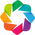

In [6]:
import clearwater_riverine as cwr

## Instantiate Clearwater-Riverine
In this example, we use HDF output from a HEC-RAS 2D model as our flow field, from Sumwere Creek (described above).

### Set paths
Ensure that you have followed the instructions in the Data Availability Section, and that you have all files downloaded in `examples/data_temp/sumwere_creek_coarse_p48`. 

In [7]:
test_case_path = project_path / 'examples/data_temp' / model_name
flow_field_fpath = test_case_path / 'clearWaterTestCases.p48.hdf'
initial_condition_path = test_case_path / 'cwr_initial_conditions_temp.csv'
boundary_condition_path = test_case_path / 'cwr_boundary_conditions_temp.csv'

In [8]:
# Confirm flow model file exists
flow_field_fpath.exists()

True

### Define Model Mesh
There are two ways to instantiate a Clearwater Riverine model. Here, we will set it up using the following inputs:
* `flow_field_file_path`: input the path to the model flow field
* `constituent_dict`: a dictionary defining all constituents, as well as filepaths for their initial and boundary conditions
* `diffusion_coefficient_input` (optional): the user-defined diffusion coefficient. If not specified, this will default to 0 (i.e., no diffusion).
* `verbose` (optional): we set this equal to `True` for the demo so that we see the model's progress as it runs
* `datetime_range` (optional): the datetime indices or strings specifying the range of timesteps over which to instantiate and run the model. In this instance, since we have a flow field for a full 2 days 1-second output, we will instantiate a smaller subset of the data using this optional input. 

Here, we will be simulating temperature, so I will set up my `constituent_dict` with constituent names (`water_temp_c`) as the key and the initial and boundary condition filepaths as well as units in a dictionary. Note that you could add as many constituents as desired to this dictionary as additional keys.

In [9]:
constituent_dict = {
    'water_temp_c': {
        'initial_conditions': initial_condition_path,
        'boundary_conditions': boundary_condition_path,
        'units': 'degC',
    }
}

Next, we set up the datetime range to start 8 hours into the simulation and finish three hours later. Here, we define the datetime range as a tuple of integers, but it could also optionally be defined as a tuple of strings representing datetimes.

In [17]:
start_index = int(8*60*(60/30))  # start at 8:00 am on the first day of the simulation (30 second model)
end_index = start_index + int(24*60*(60/30))  # end 24 hours later (30 second model)

Finally, instantiate the model:

In [18]:
%%time
# Instatiate the model object
transport_model = cwr.ClearwaterRiverine(
    flow_field_file_path=flow_field_fpath,
    diffusion_coefficient_input=0.001,
    constituent_dict=constituent_dict,
    verbose=True,
    datetime_range= (start_index, end_index)
)

Populating Model Mesh...
Calculating Required Parameters...
CPU times: total: 203 ms
Wall time: 200 ms


**Note:** models can alternatively get instantiated with a config file. See [02_coupling_riverine_modules.ipynb](./02_coupling_riverine_modules.ipynb) for an example instantiating using this method.

The model is now initialized and ready to run. We can examine the model mesh as follows-- note that you can see `water_temp_c` was added as a data variable in teh xarray representation of the model mesh, with units of `degC` and initial conditions populated for the first timestep:

In [19]:
transport_model.mesh

<xarray.Dataset>
Dimensions:                 (node: 549, time: 2881, nface: 444, nmax_face: 8,
                             nedge: 915, 2: 2)
Coordinates:
    node_x                  (node) float64 5.004e+05 5.005e+05 ... 5.024e+05
    node_y                  (node) float64 2.381e+03 2.376e+03 ... 500.0 500.0
  * time                    (time) datetime64[ns] 2022-05-13T08:00:00 ... 202...
    face_x                  (nface) float64 5.005e+05 5.006e+05 ... 5.024e+05
    face_y                  (nface) float64 2.45e+03 2.45e+03 ... 500.0 564.4
Dimensions without coordinates: node, nface, nmax_face, nedge, 2
Data variables: (12/18)
    mesh2d                  int32 0
    face_nodes              (nface, nmax_face) int32 0 1 2 3 545 ... -1 -1 -1 -1
    edge_nodes              (nedge, 2) int32 0 1 1 2 2 3 ... 43 547 418 548 519
    edge_face_connectivity  (nedge, 2) int32 0 207 0 208 0 ... 194 442 329 443
    edges_face1             (nedge) int32 0 0 0 0 207 207 ... 366 0 19 194 329
    edges_face2             (nedge) int32 207 208 1 367 208 ... 440 441 442 443
    ...                      ...
    advection_coeff         (time, nedge) float32 0.0 0.0 0.0 ... 0.0 0.0 14.48
    edge_vertical_area      (time, nedge) float32 0.0 0.0 0.0 ... 0.0 0.0 27.79
    face_to_face_dist       (nedge) float64 143.2 161.4 100.0 ... 50.0 55.01
    coeff_to_diffusion      (time, nedge) float64 0.0 0.0 0.0 ... 0.0 0.0005051
    dt                      (time) float64 30.0 30.0 30.0 30.0 ... 30.0 30.0 nan
    water_temp_c            (time, nface) float64 15.0 15.0 15.0 ... nan nan nan
Attributes: (12/13)
    Conventions:                       CF-1.8 UGRID-1.0 Deltares-0.10
    diffusion_coefficient:             0.001
    volume_calculation_required:       False
    face_area_calculation_required:    False
    face_area_elevation_info:          Empty DataFrame\nColumns: []\nIndex: []
    face_area_elevation_values:        Empty DataFrame\nColumns: []\nIndex: []
    ...                                ...
    face_cell_indexes_df:              Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_info:        Empty DataFrame\nColumns: []\nIndex: []
    face_volume_elevation_values:      Empty DataFrame\nColumns: []\nIndex: []
    boundary_data:                     Empty DataFrame\nColumns: []\nIndex: []
    units:                             Metric
    nreal:                             366

## Run Model
Let's run the model for 1000 timesteps:

In [20]:
%%time
for t in range(1001):
    transport_model.update()

CPU times: total: 15.7 s
Wall time: 15.9 s


## Plot Results

### Timeseries
We can see that the model runs for the first 1,000 timesteps (1 second each) in the timeseries plots below:

In [21]:
# plot full time horizon for a single cell
hv.Curve(
    transport_model.mesh.water_temp_c.isel(nface=281)
)

:Curve   [time]   (water_temp_c)

We can run for another 1000 timesteps and see how the output plot changes:

In [22]:
for t in range(1001):
    transport_model.update()

In [23]:
# plot full time horizon
hv.Curve(
    transport_model.mesh.water_temp_c.isel(nface=281)
)

:Curve   [time]   (water_temp_c)

The model ran for another 2000 timesteps.

### Map
We can also plot a simple dynamic map of the model results using Clearwater Riverine's built in `plot` function. We specify the following:
* `crs`: the coordinate reference system of the plan.
* `clim`: the minimum and maximum value for the color bar. We set these between 4 C and 26 C.

In [24]:
%%time
transport_model.plot(
    crs='EPSG:26916',
    clim=(4,26),
)

C:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\ClearWater-riverine\src\clearwater_riverine\transport.py:528: UserWarning: No constituent name defined. Plotting water_temp_c.
  warnings.warn(


CPU times: total: 531 ms
Wall time: 514 ms


:DynamicMap   [datetime]
   :Overlay
      .Polygons.I :Polygons   [Longitude,Latitude]   (water_temp_c,cell)
      .WMTS.I     :WMTS   [Longitude,Latitude]

Using the time scrubber to the right, we can see how the temperature changes spatially over time. We see the cool water entering the domain from the creek at the first bend, and the warm water entering from the powerplant into the oxbow lake. The cool and warm water mixes.